In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | guspini
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | digras
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | caorle
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | bacuit
City not found. Skipping...
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | kaitangata
Processi

Processing Record 35 of Set 4 | swan hill
Processing Record 36 of Set 4 | half moon bay
Processing Record 37 of Set 4 | magui
City not found. Skipping...
Processing Record 38 of Set 4 | charagua
Processing Record 39 of Set 4 | hirara
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | jiayuguan
Processing Record 42 of Set 4 | ballina
Processing Record 43 of Set 4 | yarmouth
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | gizo
Processing Record 46 of Set 4 | teyateyaneng
Processing Record 47 of Set 4 | luanda
Processing Record 48 of Set 4 | mirabad
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | mossendjo
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | vitim
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | erenhot
Processing Record 6 of Set 5 | mareeba
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | kahului

Processing Record 27 of Set 8 | richards bay
Processing Record 28 of Set 8 | buy
Processing Record 29 of Set 8 | uvalde
Processing Record 30 of Set 8 | qingquan
Processing Record 31 of Set 8 | seoul
Processing Record 32 of Set 8 | pevek
Processing Record 33 of Set 8 | san jose de guanipa
Processing Record 34 of Set 8 | mahibadhoo
Processing Record 35 of Set 8 | zyryanka
Processing Record 36 of Set 8 | remedios
Processing Record 37 of Set 8 | zhaotong
Processing Record 38 of Set 8 | russkaya polyana
Processing Record 39 of Set 8 | qeshm
Processing Record 40 of Set 8 | gwanda
Processing Record 41 of Set 8 | byron bay
Processing Record 42 of Set 8 | qaqortoq
Processing Record 43 of Set 8 | nouakchott
Processing Record 44 of Set 8 | ninghai
Processing Record 45 of Set 8 | mahebourg
Processing Record 46 of Set 8 | tabas
Processing Record 47 of Set 8 | marzuq
Processing Record 48 of Set 8 | constitucion
Processing Record 49 of Set 8 | rock sound
Processing Record 50 of Set 8 | beringovskiy
P

Processing Record 12 of Set 12 | tyup
Processing Record 13 of Set 12 | deputatskiy
Processing Record 14 of Set 12 | mahon
Processing Record 15 of Set 12 | ciudad valles
Processing Record 16 of Set 12 | arman
Processing Record 17 of Set 12 | kozhevnikovo
Processing Record 18 of Set 12 | tapaua
City not found. Skipping...
Processing Record 19 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 20 of Set 12 | calabozo
Processing Record 21 of Set 12 | tepla
Processing Record 22 of Set 12 | genhe
Processing Record 23 of Set 12 | honiara
Processing Record 24 of Set 12 | ornskoldsvik
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | moerai
Processing Record 27 of Set 12 | evensk
Processing Record 28 of Set 12 | winchester
Processing Record 29 of Set 12 | turayf
Processing Record 30 of Set 12 | euclides da cunha
Processing Record 31 of Set 12 | noumea
Processing Record 32 of Set 12 | araouane
Processing Record 33 of Set 12 | mitsamiouli
Processing Record 34

In [10]:
len(city_data)

568

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,52.05,82,85,7.65,AU,2021-07-21 18:10:25
1,Guspini,39.5406,8.6294,82.58,51,6,5.61,IT,2021-07-21 18:10:25
2,Provideniya,64.3833,-173.3000,41.54,82,100,5.79,RU,2021-07-21 18:10:26
3,Ponta Do Sol,32.6667,-17.1000,75.83,76,0,0.92,PT,2021-07-21 18:07:36
4,Digras,20.1167,77.7167,75.24,93,100,12.50,IN,2021-07-21 18:10:27
5,Chokurdakh,70.6333,147.9167,42.84,76,73,7.43,RU,2021-07-21 18:10:27
6,Cabo San Lucas,22.8909,-109.9124,98.82,64,48,9.71,MX,2021-07-21 18:10:28
7,Caorle,45.5966,12.8758,84.29,64,1,0.43,IT,2021-07-21 18:10:28
8,Kapaa,22.0752,-159.3190,78.78,83,75,5.01,US,2021-07-21 18:10:29
9,Tasiilaq,65.6145,-37.6368,44.76,98,99,4.52,GL,2021-07-21 18:10:29


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-07-21 18:10:25,-33.6500,115.3333,52.05,82,85,7.65
1,Guspini,IT,2021-07-21 18:10:25,39.5406,8.6294,82.58,51,6,5.61
2,Provideniya,RU,2021-07-21 18:10:26,64.3833,-173.3000,41.54,82,100,5.79
3,Ponta Do Sol,PT,2021-07-21 18:07:36,32.6667,-17.1000,75.83,76,0,0.92
4,Digras,IN,2021-07-21 18:10:27,20.1167,77.7167,75.24,93,100,12.50
5,Chokurdakh,RU,2021-07-21 18:10:27,70.6333,147.9167,42.84,76,73,7.43
6,Cabo San Lucas,MX,2021-07-21 18:10:28,22.8909,-109.9124,98.82,64,48,9.71
7,Caorle,IT,2021-07-21 18:10:28,45.5966,12.8758,84.29,64,1,0.43
8,Kapaa,US,2021-07-21 18:10:29,22.0752,-159.3190,78.78,83,75,5.01
9,Tasiilaq,GL,2021-07-21 18:10:29,65.6145,-37.6368,44.76,98,99,4.52


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

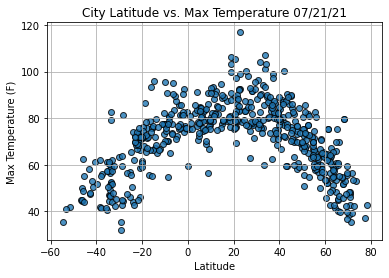

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

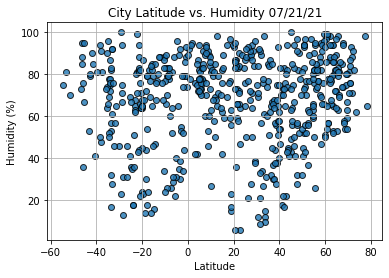

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

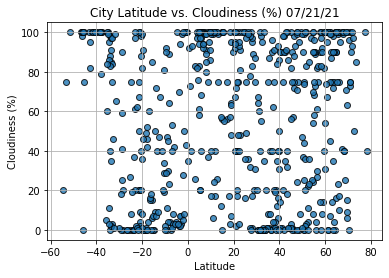

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

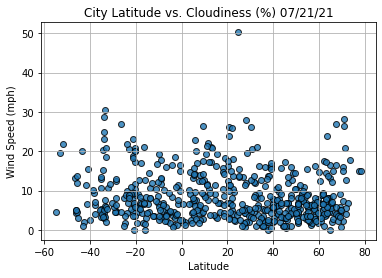

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [63]:
index13 = city_data_df.loc[13]
index13

City                   Kaitangata
Country                        NZ
Date          2021-07-21 18:08:05
Lat                      -46.2817
Lng                      169.8464
Max Temp                    49.93
Humidity                       85
Cloudiness                     98
Wind Speed                   4.23
Name: 13, dtype: object

In [64]:
city_data_df['Lat'] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
563    False
564     True
565     True
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [65]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Guspini,IT,2021-07-21 18:10:25,39.5406,8.6294,82.58,51,6,5.61
2,Provideniya,RU,2021-07-21 18:10:26,64.3833,-173.3000,41.54,82,100,5.79
3,Ponta Do Sol,PT,2021-07-21 18:07:36,32.6667,-17.1000,75.83,76,0,0.92
4,Digras,IN,2021-07-21 18:10:27,20.1167,77.7167,75.24,93,100,12.50
5,Chokurdakh,RU,2021-07-21 18:10:27,70.6333,147.9167,42.84,76,73,7.43


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

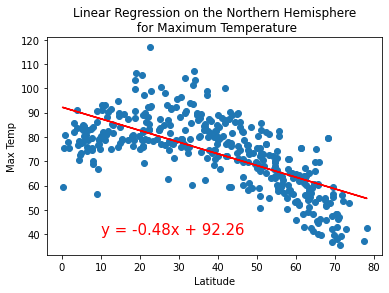

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

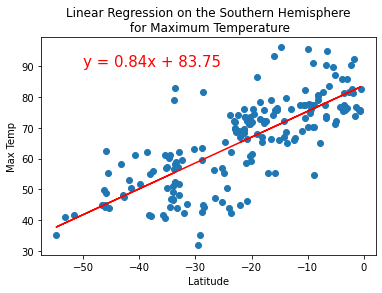

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

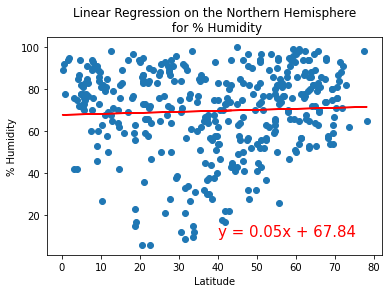

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

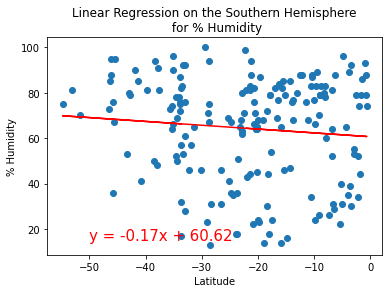

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

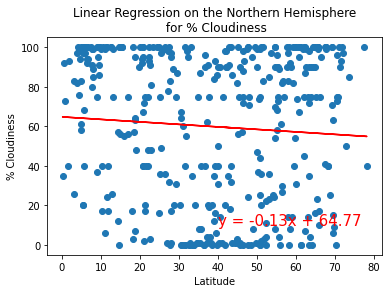

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(40,10))

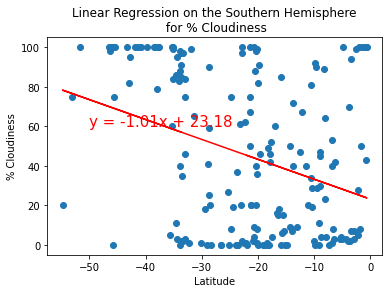

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

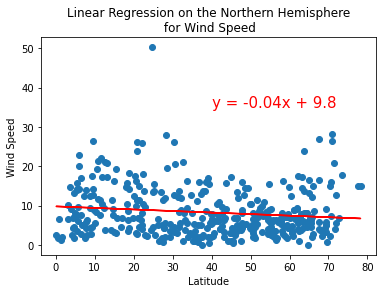

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

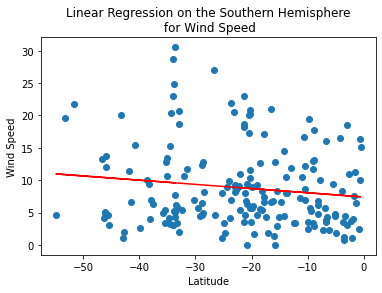

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))